# ANA675 Assignment #1

Intro: 
To process mail efficiently and route each letter to the correct destination, postal service computers must be able to scan handwritten names, addresses and zip codes and recognize the letters and digits.

Goal:
Predict which digit an image represents (recognize handwritten digits)

Compare KNeighborsClassifier, SVC and GaussianNB

In [7]:
# Load dataset
from sklearn import datasets
digits = datasets.load_digits()

# Features: From the dataset description, we know that there are 64 features and 1797 instances of handwritten numbers (0-9) input as 8X8 pixel images
X = digits.data

# Labels: Number represented by handwriting (0-9)
y = digits.target

Shape of X: (1797, 64)
Shape of y: (1797,)


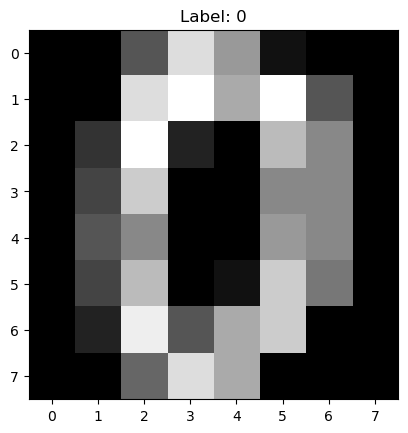

In [8]:
# Explore the data
import matplotlib.pyplot as plt

# Check the shape of the data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Visualize the first image
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

In [12]:
# Split the dataset for training and testing
from sklearn.model_selection import train_test_split

# Assign 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Let’s see if this worked as expected:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (1437, 64)
Shape of y_train (1437,)
Shape of X_test (360, 64)
Shape of y_test (360,)


In [32]:
# Build a model using KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create the KNeighborsClassifier object
knn_model = KNeighborsClassifier()

# Fit the model to the training digits data
knn_model.fit(X_train, y_train)

# Make predictions on the test digits data
y_pred_knn = knn_model.predict(X_test)

# Check predicted vs expected digit labels
print("Predicted digits (first 20): ", y_pred_knn[:20])
print("Expected digits (first 20): ", y_test[:20])

# Evaluate the model's performance
accuracy_knn = round(accuracy_score(y_test, y_pred_knn),4)
print("\nKNN Accuracy:", accuracy_knn)    

Predicted digits (first 20):  [2 5 5 8 4 7 0 1 3 1 5 6 4 8 0 8 8 5 2 8]
Expected digits (first 20):  [2 5 5 8 4 7 0 1 3 1 5 6 4 8 0 8 8 5 2 8]

KNN Accuracy: 0.9806


In [31]:
# Build a model using SVM

from sklearn import svm

# Create the SVM object - Default Kernal; Radial Basis Function (RBF)
svm_model = svm.SVC(random_state = 88, probability = True)

#Fit the model to the training digits data
svm_model.fit(X_train, y_train)

# Make predictions on the test digits data
y_pred_svm = svm_model.predict(X_test)

# Check predicted vs expected digit labels
print("Predicted digits (first 20): ", y_pred_svm[:20])
print("Expected digits (first 20): ", y_test[:20])

# Evaluate the model's performance
accuracy_svm = round(accuracy_score(y_test, y_pred_svm),4)
print("\nSVM Accuracy:", accuracy_svm)

Predicted digits (first 20):  [2 5 5 8 4 7 0 1 3 1 5 6 4 8 0 8 8 5 2 8]
Expected digits (first 20):  [2 5 5 8 4 7 0 1 3 1 5 6 4 8 0 8 8 5 2 8]

SVM Accuracy: 0.9861


In [30]:
# Build a model using GaussianNB

from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes object
gnb_model = GaussianNB()

#Fit the model to the training digits data
gnb_model.fit(X_train, y_train)

# Make predictions on the test digits data
y_pred_gnb = gnb_model.predict(X_test)

# Check predicted vs expected digit labels
print("Predicted digits (first 20): ", y_pred_gnb[:20])
print("Expected digits (first 20): ", y_test[:20])

# Evaluate the model's performance
accuracy_gnb = round(accuracy_score(y_test, y_pred_gnb),4)
print("\nGNB Accuracy:", accuracy_gnb)

Predicted digits (first 20):  [8 5 5 8 4 7 0 1 3 1 5 6 4 8 0 8 8 5 2 8]
Expected digits (first 20):  [2 5 5 8 4 7 0 1 3 1 5 6 4 8 0 8 8 5 2 8]

GNB Accuracy: 0.8417


In [48]:
# Compare the 3 models side by side

print("KNN Accuracy:", round(accuracy_knn, 4)) 
print("SVM Accuracy:", accuracy_svm)
print("GNB Accuracy:", accuracy_gnb)

KNN Accuracy: 0.9806
SVM Accuracy: 0.9861
GNB Accuracy: 0.8417


With un-tuned models:
- SVM has the highest accuracy in predicting the correct hand-written digit = 98.61%

In [42]:
# Fine-tune Models

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Set Up KFold for Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=88)

# Define KNN Hyperparameter Grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Define SVM Hyperparameter Grid
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Define GaussianNB Hyperparameter Grid
gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

In [44]:
# Set Up Grid Search for Each Model

# KNeighborsClassifier
knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_param_grid,
    cv=kf,
    scoring='accuracy',  # Use accuracy as the scoring metric
    n_jobs=-1  # Use all cores for parallel processing
)

# SVM
svm_grid_search = GridSearchCV(
    estimator=svm.SVC(),
    param_grid=svm_param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1
)

# Gaussian Naive Bayes
gnb_grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=gnb_param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1
)

In [47]:
# Fit the Models and Find the Best Parameters

# Fit KNeighborsClassifier
knn_grid_search.fit(X, y)
print(f"Best hyperparameters for KNN: {knn_grid_search.best_params_}")
print(f"Best cross-validation accuracy for KNN: {round(knn_grid_search.best_score_, 4)}")

# Fit SVM
svm_grid_search.fit(X, y)
print(f"\nBest hyperparameters for SVM: {svm_grid_search.best_params_}")
print(f"Best cross-validation accuracy for SVM: {round(svm_grid_search.best_score_, 4)}")

# Fit GaussianNB
gnb_grid_search.fit(X, y)
print(f"\nBest hyperparameters for GaussianNB: {gnb_grid_search.best_params_}")
print(f"Best cross-validation accuracy for GaussianNB: {round(gnb_grid_search.best_score_, 4)}")

Best hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.9861

Best hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.9883

Best hyperparameters for GaussianNB: {'var_smoothing': 1e-06}
Best cross-validation accuracy for GaussianNB: 0.8815


With tuned models:
- SVM still has the highest accuracy in predicting the correct hand-written digit = 98.83%
- This improved 0.22% from the un-tuned SVM to the tuned SVM model
- Move forward with SVM as the best model for this dataset

Fine-tuned SVM Accuracy: 0.9883
Confusion Matrix: 
[[29  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 48  1  0  0  2]
 [ 0  0  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 31]]


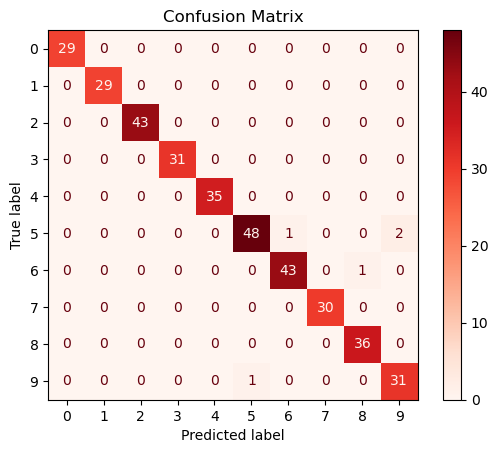

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        35
           5       0.98      0.94      0.96        51
           6       0.98      0.98      0.98        44
           7       1.00      1.00      1.00        30
           8       0.97      1.00      0.99        36
           9       0.94      0.97      0.95        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [55]:
# Report SVM Model Metrics More Clearly

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Re-Print Accuraxy
print(f'Fine-tuned SVM Accuracy: {round(svm_grid_search.best_score_, 4)}')

# Make predictions on the test digits data
y_pred_svm_tuned = svm_model.predict(X_test)

# Create a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_tuned)
print("Confusion Matrix: ")
print(conf_matrix)

# Visualize the Confusion Matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=digits.target_names).plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

# Generate a Classification Report
class_report = classification_report(y_test, y_pred_svm_tuned, target_names=[str(d) for d in digits.target_names])
print("Classification Report: ")
print(class_report)

We can see from the Confusion Matrix and Classification Report above that the SVM model struggled the most with identifying 5s and 9s accurately. 

Fives (Precision = 98%, Recall = 94%, and F1 = 96%):
- Three true 5s (out of 51 total) were incorrectly identified in the predictions(one as a 6, and two as 9s)
- While one true 9 was incorrectly identified as a 5

Nines (Precision = 94%, Recall = 97%, and F1 = 95%):
- As mentioned above, one true 9 (out of 32 total) was incorrectly identified as a 5
- While two true 5s were incorrectly identifies as a 9

Therefore, while this SVM model is the best of the models tested, and has very high accuracy (98.83%, if we were to apply this model in real life, it might be helpful to combine it with another model that has higher prediction and recall for 5s and 9s (i.e. use Ensemble Learning), to prevent mis-identification of these digits. 
